<a href="https://colab.research.google.com/github/llgithub97/INSE6220/blob/main/Jupyter_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [ ]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret

**Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

https://archive.ics.uci.edu/ml/datasets/seeds

In [ ]:
#read csv file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/llgithub97/INSE6220/main/Wholesale%20customers%20data.csv')
df.head(25)

Channel  Fresh   Milk  Grocery  Frozen  Detergent  Delicassen  Region
0         2  12669   9656     7561     214       2674        1338       3
1         2   7057   9810     9568    1762       3293        1776       3
2         2   6353   8808     7684    2405       3516        7844       3
3         1  13265   1196     4221    6404        507        1788       3
4         2  22615   5410     7198    3915       1777        5185       3
5         2   9413   8259     5126     666       1795        1451       3
6         2  12126   3199     6975     480       3140         545       3
7         2   7579   4956     9426    1669       3321        2566       3
8         1   5963   3648     6192     425       1716         750       3
9         2   6006  11093    18881    1159       7425        2098       3
10        2   3366   5403    12974    4400       5977        1744       3
11        2  13146   1124     4523    1420        549         497       3
12        2  31714  12319    11757     287       3881        2931       3
13        2  21217   6208    14982    3095       6707         602       3
14        2  24653   9465    12091     294       5058        2168       3
15        1  10253   1114     3821     397        964         412       3
16        2   1020   8816    12121     134       4508        1080       3
17        1   5876   6157     2933     839        370        4478       3
18        2  18601   6327    10099    2205       2767        3181       3
19        1   7780   2495     9464     669       2518         501       3
20        2  17546   4519     4602    1066       2259        2124       3
21        1   5567    871     2010    3383        375         569       3
22        1  31276   1917     4469    9408       2381        4334       3
23        2  26373  36423    22019    5154       4337       16523       3
24        2  22647   9776    13792    2915       4482        5778       3

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Channel     440 non-null    int64
 1   Fresh       440 non-null    int64
 2   Milk        440 non-null    int64
 3   Grocery     440 non-null    int64
 4   Frozen      440 non-null    int64
 5   Detergent   440 non-null    int64
 6   Delicassen  440 non-null    int64
 7   Region      440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

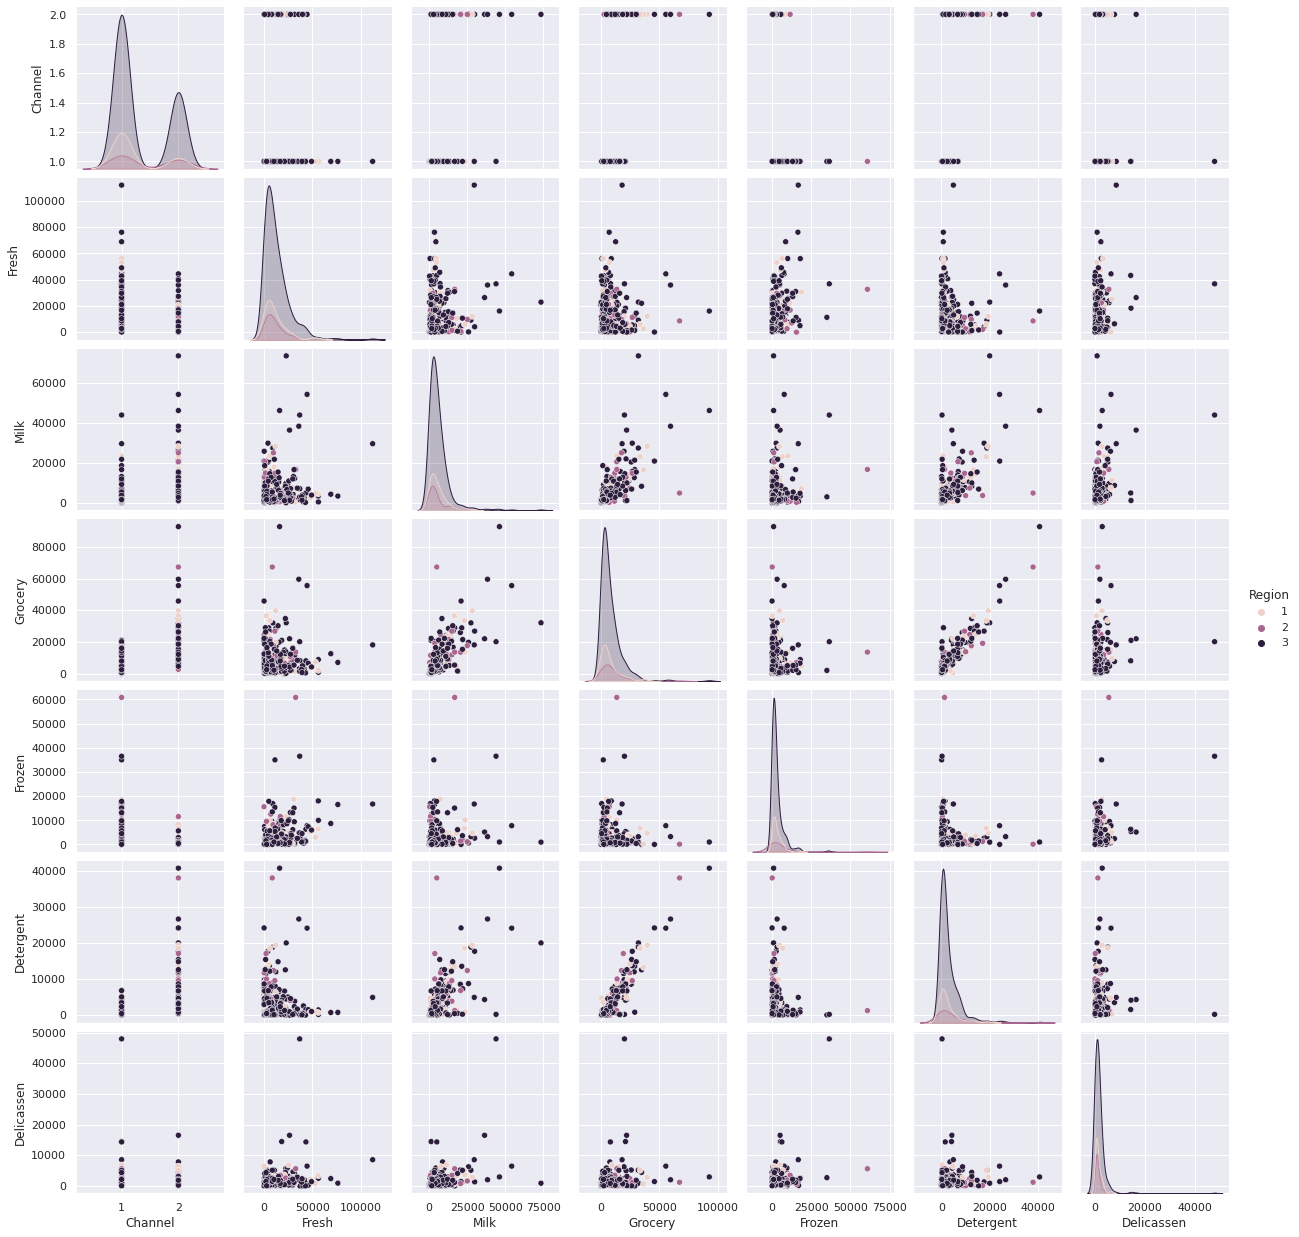

In [ ]:
sns.pairplot(df, hue='Region')
plt.show()

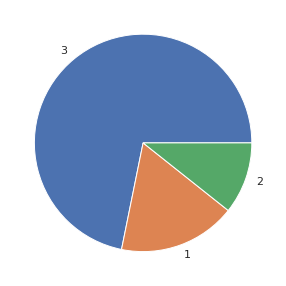

In [ ]:
y =df['Region']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [ ]:
X = df.drop(columns=['Region'])
X.head(10)

Channel  Fresh   Milk  Grocery  Frozen  Detergent  Delicassen
0        2  12669   9656     7561     214       2674        1338
1        2   7057   9810     9568    1762       3293        1776
2        2   6353   8808     7684    2405       3516        7844
3        1  13265   1196     4221    6404        507        1788
4        2  22615   5410     7198    3915       1777        5185
5        2   9413   8259     5126     666       1795        1451
6        2  12126   3199     6975     480       3140         545
7        2   7579   4956     9426    1669       3321        2566
8        1   5963   3648     6192     425       1716         750
9        2   6006  11093    18881    1159       7425        2098

In [ ]:
X.describe().transpose()

count          mean           std   min      25%     50%  \
Channel     440.0      1.322727      0.468052   1.0     1.00     1.0   
Fresh       440.0  12000.297727  12647.328865   3.0  3127.75  8504.0   
Milk        440.0   5796.265909   7380.377175  55.0  1533.00  3627.0   
Grocery     440.0   7951.277273   9503.162829   3.0  2153.00  4755.5   
Frozen      440.0   3071.931818   4854.673333  25.0   742.25  1526.0   
Detergent   440.0   2881.493182   4767.854448   3.0   256.75   816.5   
Delicassen  440.0   1524.870455   2820.105937   3.0   408.25   965.5   

                 75%       max  
Channel         2.00       2.0  
Fresh       16933.75  112151.0  
Milk         7190.25   73498.0  
Grocery     10655.75   92780.0  
Frozen       3554.25   60869.0  
Detergent    3922.00   40827.0  
Delicassen   1820.25   47943.0

**Standardize the Data**

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Channel     Fresh      Milk   Grocery    Frozen  Detergent  Delicassen
0  1.448652  0.052933  0.523568 -0.041115 -0.589367  -0.043569   -0.066339
1  1.448652 -0.391302  0.544458  0.170318 -0.270136   0.086407    0.089151
2  1.448652 -0.447029  0.408538 -0.028157 -0.137536   0.133232    2.243293
3 -0.690297  0.100111 -0.624020 -0.392977  0.687144  -0.498588    0.093411
4  1.448652  0.840239 -0.052396 -0.079356  0.173859  -0.231918    1.299347
5  1.448652 -0.204806  0.334067 -0.297637 -0.496155  -0.228138   -0.026224
6  1.448652  0.009950 -0.352316 -0.102849 -0.534512   0.054280   -0.347854
7  1.448652 -0.349981 -0.113981  0.155359 -0.289315   0.092286    0.369601
8 -0.690297 -0.477901 -0.291409 -0.185336 -0.545854  -0.244726   -0.275079
9  1.448652 -0.474497  0.718495  1.151423 -0.394488   0.954031    0.203461

In [ ]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
Channel     440.0 -2.452584e-16  1.001138 -0.690297 -0.690297 -0.690297   
Fresh       440.0 -2.422305e-17  1.001138 -0.949683 -0.702334 -0.276760   
Milk        440.0 -1.589638e-17  1.001138 -0.778795 -0.578306 -0.294258   
Grocery     440.0 -6.030530e-17  1.001138 -0.837334 -0.610836 -0.336668   
Frozen      440.0  1.135455e-17  1.001138 -0.628343 -0.480431 -0.318804   
Detergent   440.0 -1.917658e-17  1.001138 -0.604416 -0.551135 -0.433600   
Delicassen  440.0 -8.276208e-17  1.001138 -0.540264 -0.396401 -0.198577   

                 75%        max  
Channel     1.448652   1.448652  
Fresh       0.390523   7.927738  
Milk        0.189092   9.183650  
Grocery     0.284911   8.936528  
Frozen      0.099464  11.919002  
Detergent   0.218482   7.967672  
Delicassen  0.104860  16.478447

**Observations and variables**

In [ ]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

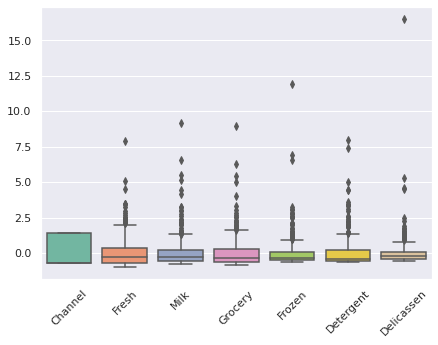

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

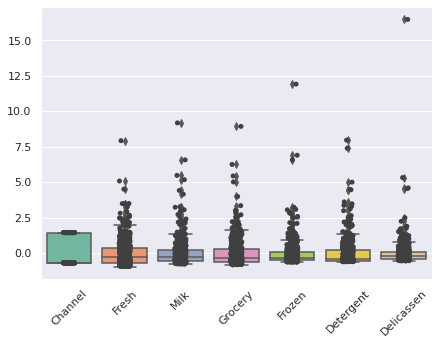

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

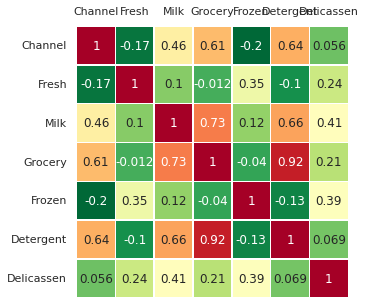

In [ ]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

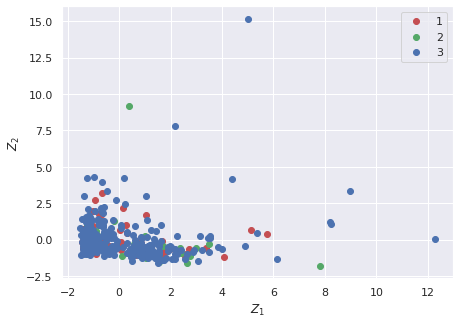

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(0)->0,  2(1)->1, 3(2)->2
idx_0 = np.where(y == 1)
idx_1 = np.where(y == 2)
idx_2 = np.where(y == 3)

plt. figure()
plt.scatter(Z[idx_0,0], Z[idx_0,1], c='r', label='1')
plt.scatter(Z[idx_1,0], Z[idx_1,1], c='g', label='2')
plt.scatter(Z[idx_2,0], Z[idx_2,1], c='b', label='3')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

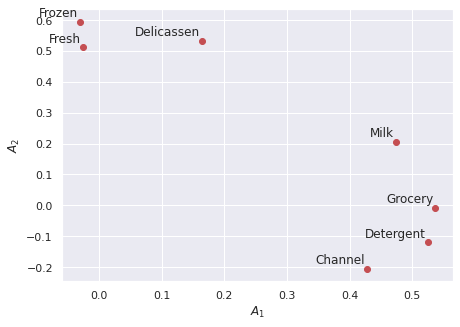

In [ ]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


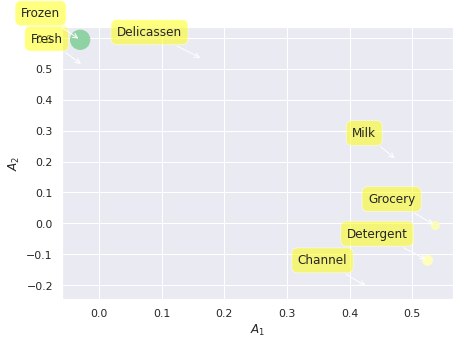

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

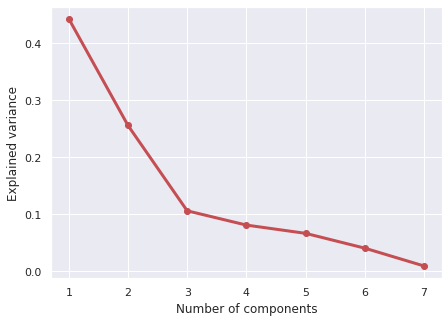

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

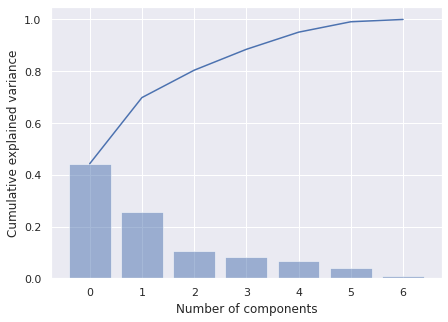

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

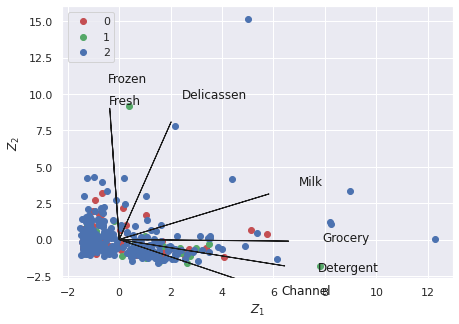

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_0,0], Z[idx_0,1], c='r', label='0')
plt.scatter(Z[idx_1,0], Z[idx_1,1], c='g', label='1')
plt.scatter(Z[idx_2,0], Z[idx_2,1], c='b', label='2')
plt.legend(loc='upper left')

##**Using PCA Library**

In [ ]:
!pip install pca

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=ba7bdacc7f36c196e13d224e1a6b7fd92b5025379137d3d2f0822a71bbbeca16
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [ ]:
out['PC']

PC1       PC2       PC3       PC4       PC5
0    0.829041 -0.543064 -0.121397 -0.596543 -0.970706
1    1.048167 -0.510652  0.336126 -0.279449 -0.916580
2    1.253613  0.656304  1.546917 -1.374122 -1.070848
3   -1.071759  0.585254  0.162317  0.385612  0.044591
4    0.617812  0.946435  0.097599 -0.995724 -1.510478
..        ...       ...       ...       ...       ...
435  0.207323  2.459652 -0.610500  1.076233  0.263877
436 -1.306912  1.531293 -1.410589 -0.605283 -0.214787
437  3.852098 -0.499113 -0.723690  0.071775  0.240322
438 -1.112038 -0.097686  0.255174 -0.495204  0.306986
439 -1.180104 -0.929736  0.297253 -0.065846  0.454950

[440 rows x 5 columns]

**Scatter plot**

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7feeb6564450>)

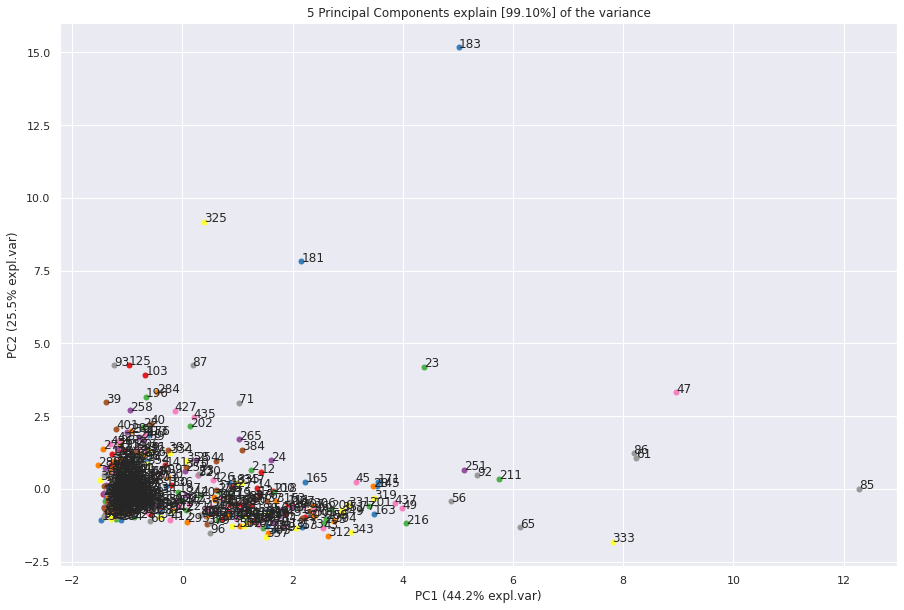

In [ ]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [ ]:
A = out['loadings'].T

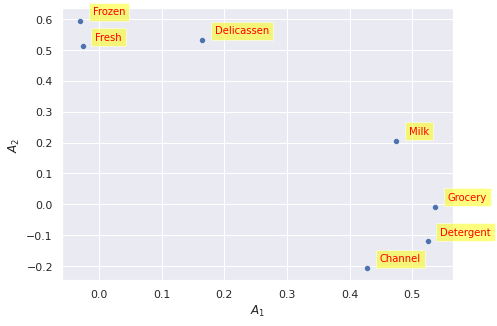

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

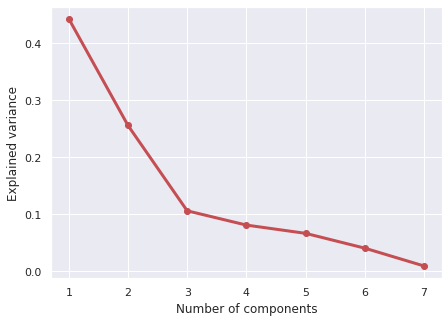

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

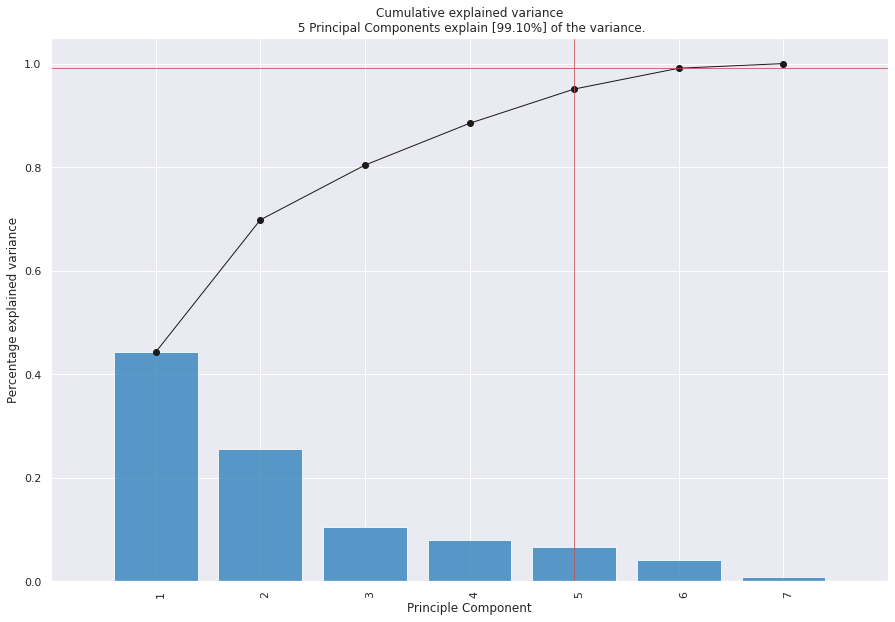

<Figure size 504x360 with 0 Axes>

In [ ]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.


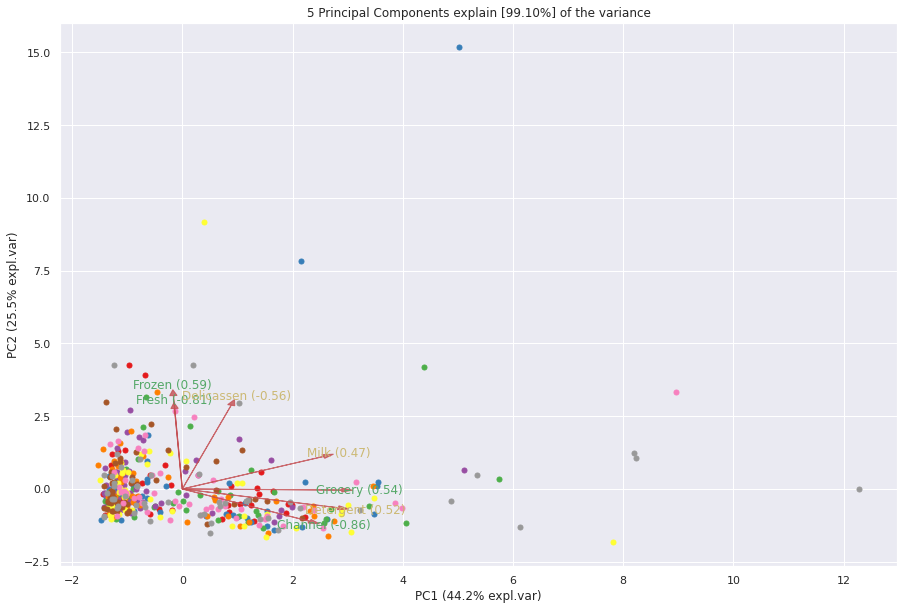

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7feeb3c20610>)

In [ ]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


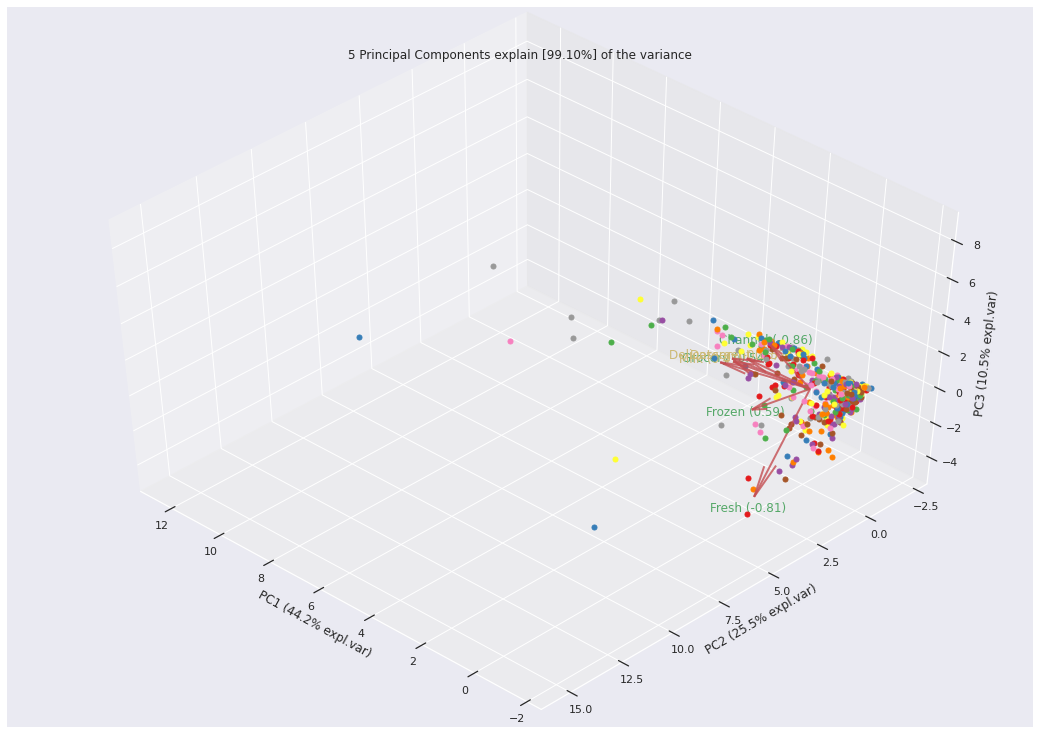

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7feeb71e1d50>)

In [ ]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

In [ ]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [ ]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (396, 8)
Unseen Data For Predictions: (44, 8)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='Region', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target            Region
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (396, 8)
5                           Missing Values             False
6                         Numeric Features                 6
7                     Categorical Features                 1
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (277, 7)
12                    Transformed Test Set          (119, 7)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              f0ae
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [ ]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.7294  0.4821  0.3523  0.5507   
dummy                    Dummy Classifier    0.7294  0.5000  0.3333  0.5322   
ridge                    Ridge Classifier    0.7258  0.0000  0.3317  0.5315   
lda          Linear Discriminant Analysis    0.7187  0.5035  0.3284  0.5300   
rf               Random Forest Classifier    0.7003  0.4956  0.3252  0.5362   
et                 Extra Trees Classifier    0.6968  0.5106  0.3237  0.5350   
lightgbm  Light Gradient Boosting Machine    0.6861  0.5409  0.3488  0.5710   
knn                K Neighbors Classifier    0.6791  0.4818  0.3373  0.5854   
ada                  Ada Boost Classifier    0.6791  0.4748  0.3891  0.5967   
gbc          Gradient Boosting Classifier    0.6716  0.5172  0.3367  0.5474   
svm                   SVM - Linear Kernel    0.6676  0.0000  0.3844  0.6028   
dt               Decision Tree Classifier    0.5557  0.4837  0.3449  0.5614   
qda       Quadratic Discriminant Analysis    0.4903  0.5348  0.3844  0.6078   
nb                            Naive Bayes    0.3964  0.4840  0.3521  0.5695   

              F1   Kappa     MCC  TT (Sec)  
lr        0.6239  0.0262  0.0413     0.415  
dummy     0.6153  0.0000  0.0000     0.015  
ridge     0.6135 -0.0046 -0.0080     0.015  
lda       0.6100 -0.0148 -0.0252     0.017  
rf        0.6051 -0.0302 -0.0421     0.527  
et        0.6042 -0.0254 -0.0392     0.473  
lightgbm  0.6159  0.0265  0.0291     0.102  
knn       0.6136  0.0117  0.0264     0.116  
ada       0.6269  0.0776  0.0817     0.120  
gbc       0.6016 -0.0021  0.0030     0.323  
svm       0.6153  0.0901  0.1127     0.062  
dt        0.5569 -0.0182 -0.0184     0.018  
qda       0.5086  0.0830  0.0944     0.018  
nb        0.4081  0.0130  0.0074     0.017

In [ ]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [ ]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5357  0.4790  0.2889  0.5883  0.5607 -0.0341 -0.0346
1       0.5714  0.4510  0.3048  0.5952  0.5804 -0.0500 -0.0506
2       0.5714  0.5388  0.3667  0.5773  0.5723  0.0744  0.0750
3       0.6071  0.5640  0.3778  0.5656  0.5843  0.0914  0.0935
4       0.5000  0.4121  0.2333  0.4762  0.4878 -0.1843 -0.1864
5       0.6071  0.5605  0.4278  0.6071  0.6071  0.1200  0.1200
6       0.5714  0.4555  0.3167  0.5227  0.5459 -0.0633 -0.0646
7       0.4815  0.4002  0.2833  0.5185  0.4975 -0.1250 -0.1270
8       0.4815  0.3951  0.2167  0.5068  0.4938 -0.2000 -0.2008
9       0.6296  0.5806  0.6333  0.6564  0.6387  0.1892  0.1917
Mean    0.5557  0.4837  0.3449  0.5614  0.5569 -0.0182 -0.0184
SD      0.0510  0.0683  0.1139  0.0518  0.0481  0.1257  0.1270

In [ ]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [ ]:
tuned_dt = tune_model(dt)

Accuracy  AUC  Recall   Prec.      F1  Kappa  MCC
0       0.7500  0.5  0.3333  0.5625  0.6429    0.0  0.0
1       0.7500  0.5  0.3333  0.5625  0.6429    0.0  0.0
2       0.7143  0.5  0.3333  0.5102  0.5952    0.0  0.0
3       0.7143  0.5  0.3333  0.5102  0.5952    0.0  0.0
4       0.7143  0.5  0.3333  0.5102  0.5952    0.0  0.0
5       0.7143  0.5  0.3333  0.5102  0.5952    0.0  0.0
6       0.7143  0.5  0.3333  0.5102  0.5952    0.0  0.0
7       0.7407  0.5  0.3333  0.5487  0.6304    0.0  0.0
8       0.7407  0.5  0.3333  0.5487  0.6304    0.0  0.0
9       0.7407  0.5  0.3333  0.5487  0.6304    0.0  0.0
Mean    0.7294  0.5  0.3333  0.5322  0.6153    0.0  0.0
SD      0.0154  0.0  0.0000  0.0225  0.0205    0.0  0.0

In [ ]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.2, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [ ]:
!pip install statsmodels --upgrade

How to analyze model performance using various plots

In [ ]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [ ]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5714  0.5749  0.3048  0.5923  0.5812 -0.0182 -0.0183
1       0.6786  0.5029  0.3016  0.5481  0.6064 -0.1053 -0.1328
2       0.7500  0.5749  0.4000  0.7280  0.6806  0.2344  0.3115
3       0.7857  0.5101  0.4667  0.7280  0.7232  0.3386  0.4508
4       0.6786  0.4897  0.3167  0.5026  0.5775 -0.0544 -0.0946
5       0.6071  0.5092  0.2833  0.4857  0.5397 -0.1365 -0.1594
6       0.5714  0.4355  0.2667  0.4762  0.5195 -0.1831 -0.2006
7       0.7778  0.6364  0.4167  0.7179  0.7034  0.2098  0.3420
8       0.6667  0.3255  0.3000  0.5333  0.5926 -0.1096 -0.1386
9       0.7037  0.2588  0.3167  0.5413  0.6119 -0.0588 -0.0961
Mean    0.6791  0.4818  0.3373  0.5854  0.6136  0.0117  0.0264
SD      0.0743  0.1094  0.0628  0.0965  0.0646  0.1715  0.2305

**Tune K Neighbors Model**

In [ ]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1  Kappa  MCC
0       0.7500  0.4904  0.3333  0.5625  0.6429    0.0  0.0
1       0.7500  0.4621  0.3333  0.5625  0.6429    0.0  0.0
2       0.7143  0.4747  0.3333  0.5102  0.5952    0.0  0.0
3       0.7143  0.4731  0.3333  0.5102  0.5952    0.0  0.0
4       0.7143  0.5417  0.3333  0.5102  0.5952    0.0  0.0
5       0.7143  0.4433  0.3333  0.5102  0.5952    0.0  0.0
6       0.7143  0.4416  0.3333  0.5102  0.5952    0.0  0.0
7       0.7407  0.5326  0.3333  0.5487  0.6304    0.0  0.0
8       0.7407  0.4990  0.3333  0.5487  0.6304    0.0  0.0
9       0.7407  0.3998  0.3333  0.5487  0.6304    0.0  0.0
Mean    0.7294  0.4758  0.3333  0.5322  0.6153    0.0  0.0
SD      0.0154  0.0406  0.0000  0.0225  0.0205    0.0  0.0

**Evaluate K Neighbors Model**

In [ ]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [ ]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7500  0.5135  0.3333  0.5625  0.6429  0.0000  0.0000
1       0.7143  0.5265  0.3175  0.5556  0.6250 -0.0566 -0.0922
2       0.7143  0.5604  0.4278  0.5755  0.6329  0.1318  0.1782
3       0.7143  0.5079  0.3333  0.5102  0.5952  0.0000  0.0000
4       0.7143  0.2825  0.3333  0.5102  0.5952  0.0000  0.0000
5       0.7500  0.6023  0.4444  0.6362  0.6615  0.1867  0.3273
6       0.7143  0.4071  0.3333  0.5102  0.5952  0.0000  0.0000
7       0.7407  0.4761  0.3333  0.5487  0.6304  0.0000  0.0000
8       0.7407  0.5789  0.3333  0.5487  0.6304  0.0000  0.0000
9       0.7407  0.3663  0.3333  0.5487  0.6304  0.0000  0.0000
Mean    0.7294  0.4821  0.3523  0.5507  0.6239  0.0262  0.0413
SD      0.0154  0.0962  0.0423  0.0361  0.0211  0.0697  0.1142

**Tune Logistic Regression Model**

In [ ]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7500  0.5135  0.3333  0.5625  0.6429  0.0000  0.0000
1       0.7143  0.5265  0.3175  0.5556  0.6250 -0.0566 -0.0922
2       0.7143  0.5573  0.4278  0.5755  0.6329  0.1318  0.1782
3       0.7143  0.5079  0.3333  0.5102  0.5952  0.0000  0.0000
4       0.7143  0.2841  0.3333  0.5102  0.5952  0.0000  0.0000
5       0.7500  0.6023  0.4444  0.6362  0.6615  0.1867  0.3273
6       0.7143  0.4071  0.3333  0.5102  0.5952  0.0000  0.0000
7       0.7407  0.4814  0.3333  0.5487  0.6304  0.0000  0.0000
8       0.7407  0.5736  0.3333  0.5487  0.6304  0.0000  0.0000
9       0.7407  0.3716  0.3333  0.5487  0.6304  0.0000  0.0000
Mean    0.7294  0.4825  0.3523  0.5507  0.6239  0.0262  0.0413
SD      0.0154  0.0944  0.0423  0.0361  0.0211  0.0697  0.1142

**Evaluate Logistic Regression Model**

In [ ]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [ ]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7143  0.4192  0.3175  0.5556  0.6250 -0.0566 -0.0922
1       0.7143  0.4723  0.3175  0.5556  0.6250 -0.0566 -0.0922
2       0.7143  0.5312  0.3333  0.5102  0.5952  0.0000  0.0000
3       0.7143  0.5778  0.3333  0.5102  0.5952  0.0000  0.0000
4       0.7143  0.3775  0.3333  0.5102  0.5952  0.0000  0.0000
5       0.6429  0.5000  0.3000  0.4945  0.5590 -0.0938 -0.1246
6       0.7143  0.4270  0.3833  0.6113  0.6411  0.1181  0.1572
7       0.7407  0.5777  0.3333  0.5487  0.6304  0.0000  0.0000
8       0.7037  0.5067  0.3167  0.5413  0.6119 -0.0588 -0.0961
9       0.6296  0.5662  0.2833  0.5247  0.5724 -0.1538 -0.1732
Mean    0.7003  0.4956  0.3252  0.5362  0.6051 -0.0302 -0.0421
SD      0.0333  0.0670  0.0249  0.0323  0.0250  0.0687  0.0887

**Tune Random Forest Model**

In [ ]:
tuned_rf = tune_model(rf)

Accuracy  AUC  Recall   Prec.      F1  Kappa  MCC
0       0.7500  0.5  0.3333  0.5625  0.6429    0.0  0.0
1       0.7500  0.5  0.3333  0.5625  0.6429    0.0  0.0
2       0.7143  0.5  0.3333  0.5102  0.5952    0.0  0.0
3       0.7143  0.5  0.3333  0.5102  0.5952    0.0  0.0
4       0.7143  0.5  0.3333  0.5102  0.5952    0.0  0.0
5       0.7143  0.5  0.3333  0.5102  0.5952    0.0  0.0
6       0.7143  0.5  0.3333  0.5102  0.5952    0.0  0.0
7       0.7407  0.5  0.3333  0.5487  0.6304    0.0  0.0
8       0.7407  0.5  0.3333  0.5487  0.6304    0.0  0.0
9       0.7407  0.5  0.3333  0.5487  0.6304    0.0  0.0
Mean    0.7294  0.5  0.3333  0.5322  0.6153    0.0  0.0
SD      0.0154  0.0  0.0000  0.0225  0.0205    0.0  0.0

**Evaluate Random Forest Model**

In [ ]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7500  0.5135  0.3333  0.5625  0.6429  0.0000  0.0000
1       0.7143  0.5265  0.3175  0.5556  0.6250 -0.0566 -0.0922
2       0.7143  0.5573  0.4278  0.5755  0.6329  0.1318  0.1782
3       0.7143  0.5079  0.3333  0.5102  0.5952  0.0000  0.0000
4       0.7143  0.2841  0.3333  0.5102  0.5952  0.0000  0.0000
5       0.7500  0.6023  0.4444  0.6362  0.6615  0.1867  0.3273
6       0.7143  0.4071  0.3333  0.5102  0.5952  0.0000  0.0000
7       0.7407  0.4814  0.3333  0.5487  0.6304  0.0000  0.0000
8       0.7407  0.5736  0.3333  0.5487  0.6304  0.0000  0.0000
9       0.7407  0.3716  0.3333  0.5487  0.6304  0.0000  0.0000
Mean    0.7294  0.4825  0.3523  0.5507  0.6239  0.0262  0.0413
SD      0.0154  0.0944  0.0423  0.0361  0.0211  0.0697  0.1142

In [ ]:
tuned_best_model

LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [70]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [71]:
clf_pca = setup(data=data, target='Region', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target            Region
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (396, 8)
5                           Missing Values             False
6                         Numeric Features                 6
7                     Categorical Features                 1
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (277, 3)
12                    Transformed Test Set          (119, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              1c60
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [79]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
dummy                    Dummy Classifier    0.7294  0.5000  0.3333  0.5322   
lr                    Logistic Regression    0.7258  0.4100  0.3317  0.5315   
ridge                    Ridge Classifier    0.7258  0.0000  0.3317  0.5315   
lda          Linear Discriminant Analysis    0.7258  0.3746  0.3317  0.5315   
nb                            Naive Bayes    0.7187  0.4395  0.3283  0.5298   
rf               Random Forest Classifier    0.6897  0.4591  0.3296  0.5419   
qda       Quadratic Discriminant Analysis    0.6829  0.4381  0.3167  0.5249   
ada                  Ada Boost Classifier    0.6787  0.4760  0.3254  0.5493   
lightgbm  Light Gradient Boosting Machine    0.6786  0.4955  0.3547  0.5722   
et                 Extra Trees Classifier    0.6754  0.4632  0.3298  0.5519   
gbc          Gradient Boosting Classifier    0.6644  0.4580  0.3349  0.5790   
svm                   SVM - Linear Kernel    0.6574  0.0000  0.3345  0.5423   
knn                K Neighbors Classifier    0.6499  0.4863  0.3291  0.5679   
dt               Decision Tree Classifier    0.5631  0.5123  0.3288  0.5738   

              F1   Kappa     MCC  TT (Sec)  
dummy     0.6153  0.0000  0.0000     0.015  
lr        0.6135 -0.0046 -0.0080     0.026  
ridge     0.6135 -0.0046 -0.0080     0.015  
lda       0.6135 -0.0046 -0.0080     0.019  
nb        0.6098 -0.0120 -0.0144     0.020  
rf        0.6057 -0.0101 -0.0194     0.681  
qda       0.5911 -0.0357 -0.0427     0.053  
ada       0.6062 -0.0001 -0.0098     0.117  
lightgbm  0.6164  0.0296  0.0205     0.064  
et        0.6029 -0.0079  0.0004     0.477  
gbc       0.6071  0.0191  0.0321     0.289  
svm       0.5871 -0.0032  0.0003     0.067  
knn       0.6018  0.0001  0.0006     0.116  
dt        0.5643  0.0062  0.0074     0.019

In [76]:
best_model_pca

DummyClassifier(constant=None, random_state=123, strategy='prior')

**Tune the Best Model**

In [77]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

IntProgress(value=0, description='Processing: ', max=7)

Initiated  . . . . . . . . . . . . . . . . . .                   22:04:20
Status     . . . . . . . . . . . . . . . . . .  Searching Hyperparameters
Estimator  . . . . . . . . . . . . . . . . . .           Dummy Classifier

Empty DataFrame
Columns: [Accuracy, AUC, Recall, Prec., F1, Kappa, MCC]
Index: []

ValueError: ignored

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [78]:
evaluate_model(tuned_best_model_pca)

NameError: ignored

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [80]:
!pip install shap

     |████████████████████████████████| 564 kB 11.6 MB/s 


In [81]:
import shap

In [82]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7143  0.4113  0.3175  0.5556  0.6250 -0.0566 -0.0922
1       0.7143  0.4630  0.3175  0.5556  0.6250 -0.0566 -0.0922
2       0.7500  0.6777  0.4444  0.6030  0.6640  0.2403  0.3250
3       0.7143  0.4030  0.3333  0.5102  0.5952  0.0000  0.0000
4       0.6786  0.3901  0.3167  0.5026  0.5775 -0.0456 -0.0800
5       0.6429  0.6779  0.3000  0.5143  0.5714 -0.0409 -0.0480
6       0.5714  0.5272  0.3167  0.5317  0.5499 -0.0566 -0.0575
7       0.7037  0.3356  0.3167  0.5413  0.6119 -0.0537 -0.0875
8       0.7037  0.3482  0.3167  0.5630  0.6255  0.0270  0.0343
9       0.7037  0.3568  0.3167  0.5413  0.6119 -0.0588 -0.0961
Mean    0.6897  0.4591  0.3296  0.5419  0.6057 -0.0101 -0.0194
SD      0.0473  0.1219  0.0390  0.0282  0.0313  0.0878  0.1220

In [83]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy  AUC  Recall   Prec.      F1  Kappa  MCC
0       0.7500  0.5  0.3333  0.5625  0.6429    0.0  0.0
1       0.7500  0.5  0.3333  0.5625  0.6429    0.0  0.0
2       0.7143  0.5  0.3333  0.5102  0.5952    0.0  0.0
3       0.7143  0.5  0.3333  0.5102  0.5952    0.0  0.0
4       0.7143  0.5  0.3333  0.5102  0.5952    0.0  0.0
5       0.7143  0.5  0.3333  0.5102  0.5952    0.0  0.0
6       0.7143  0.5  0.3333  0.5102  0.5952    0.0  0.0
7       0.7407  0.5  0.3333  0.5487  0.6304    0.0  0.0
8       0.7407  0.5  0.3333  0.5487  0.6304    0.0  0.0
9       0.7407  0.5  0.3333  0.5487  0.6304    0.0  0.0
Mean    0.7294  0.5  0.3333  0.5322  0.6153    0.0  0.0
SD      0.0154  0.0  0.0000  0.0225  0.0205    0.0  0.0

**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

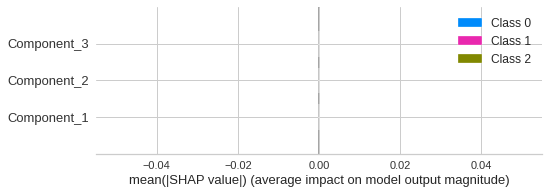

In [85]:
interpret_model(tuned_rf_pca, plot='summary')

In [86]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [87]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [89]:
interpret_model(tuned_rf_pca, plot='reason')